# Exploratory Data Analysis using Python - A Case Study

*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

In [14]:
import pandas as pd

In [16]:
survey_raw_df = pd.read_csv(r"C:/Users/dkkde/OneDrive/Desktop/survey_results_public.csv")

In [24]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [20]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

## Data Preparation & Cleaning

In [29]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [47]:
len(selected_columns)

20

extracting a copy of the data from these columns into a new data frame `survey_df`

In [49]:
survey_df = survey_raw_df[selected_columns].copy()

In [51]:
survey_df.shape

(64461, 20)

In [53]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [55]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [61]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [137]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [65]:
survey_df['Gender'].value_counts()

Gender
Man                                                            46007
Woman                                                           3843
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         74
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: count, dtype: int64

In [67]:
import numpy as np

In [69]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [71]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
47179,Greece,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,10.0,5.0,Bash/Shell/PowerShell;C;C++;HTML/CSS;JavaScrip...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Every few months,Meditate;Go for a walk or other physical activ...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",45.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Critically important
26241,United States,42.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,28.0,12.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;Dart;Go;HTML/CSS;Java;Ja...,Once every few years,Meditate;Visit Stack Overflow;Watch help / tut...,Employed full-time,"Database administrator;Developer, full-stack;D...",40.0,Very dissatisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Fairly important
26284,United States,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",Yes,14.0,5.0,3.0,JavaScript;Python,C;C++;Go;Haskell;Rust,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, full-stack",50.0,Slightly satisfied,"Industry that I’d be working in;Languages, fra...",Often: 1-2 days per week or more,Somewhat important
58385,United Kingdom,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,17.0,6.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Once every few years,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Database administrator;Developer, back-end;Dev...",40.0,Slightly satisfied,Industry that I’d be working in;Flex time or a...,Sometimes: 1-2 days per month but less than we...,Somewhat important
4067,Cyprus,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,7.0,2.0,Go;Java;JavaScript,C;Haskell;Julia;Rust;Scala,Every few months,Go for a walk or other physical activity,Employed full-time,"Developer, back-end",40.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Critically important
53821,India,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,17.0,4.0,1.0,Java;Python;SQL,Kotlin;Rust,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",40.0,Slightly satisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Not at all important/not necessary
1666,United States,30.0,Man,Some college/university study without earning ...,"A social science (such as anthropology, psycho...",Yes,30.0,NaN,NaN,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,NaN,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, front-end",40.0,Slightly satisfied,Remote work options;Opportunities for professi...,Never,Not at all important/not necessary
3206,United States,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,2.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Python;Swi...,Assembly;C;C++;Go;HTML/CSS;Kotlin;Rust;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, mobile",40.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 

## Exploratory Analysis and Visualization

In [149]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [151]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8371
United Kingdom         3883
Germany                3875
Canada                 2177
France                 1889
Brazil                 1811
Netherlands            1333
Poland                 1274
Australia              1199
Spain                  1158
Italy                  1117
Russian Federation     1086
Sweden                  881
Pakistan                803
Name: count, dtype: int64

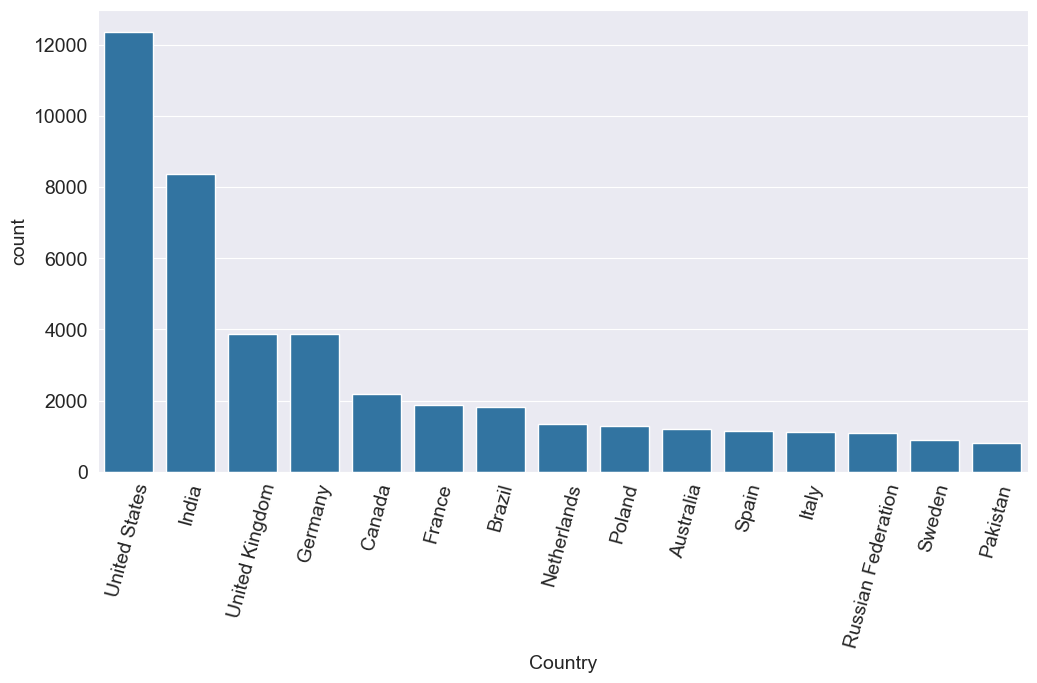

In [177]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=top_countries.index, y=top_countries);
plt.show()

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

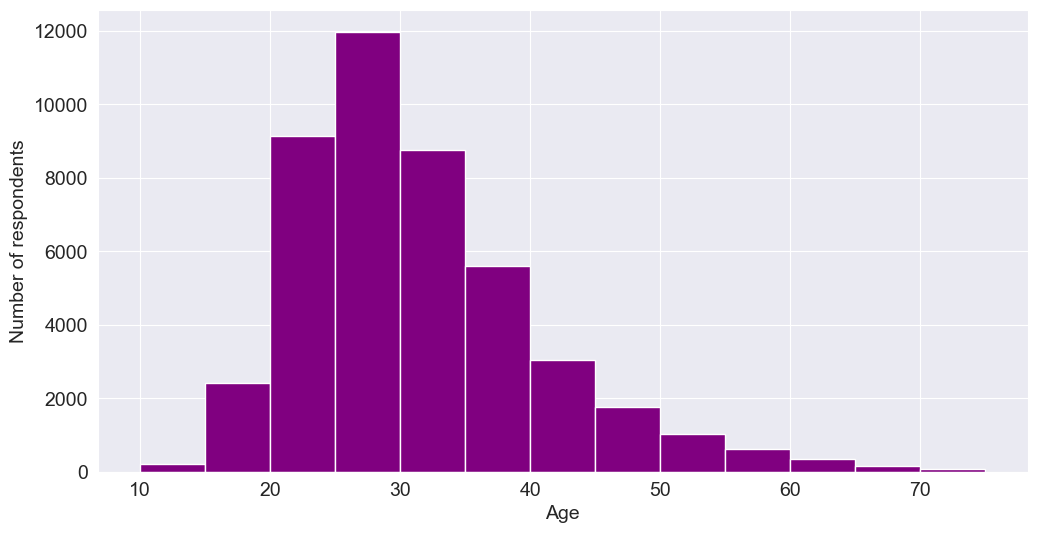

In [175]:
plt.figure(figsize=(12, 6))
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');
plt.show()

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

In [159]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  46007
Woman                                                 3843
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

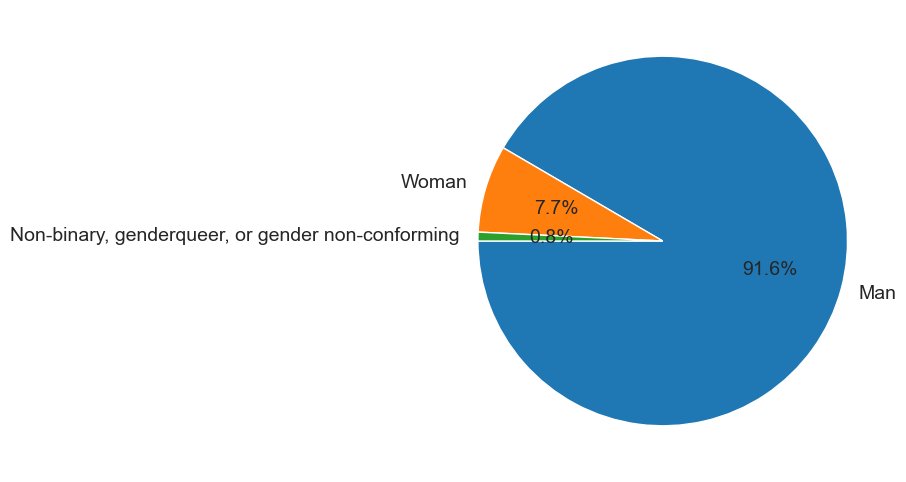

In [173]:
plt.figure(figsize=(12,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);
plt.show()

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%. 

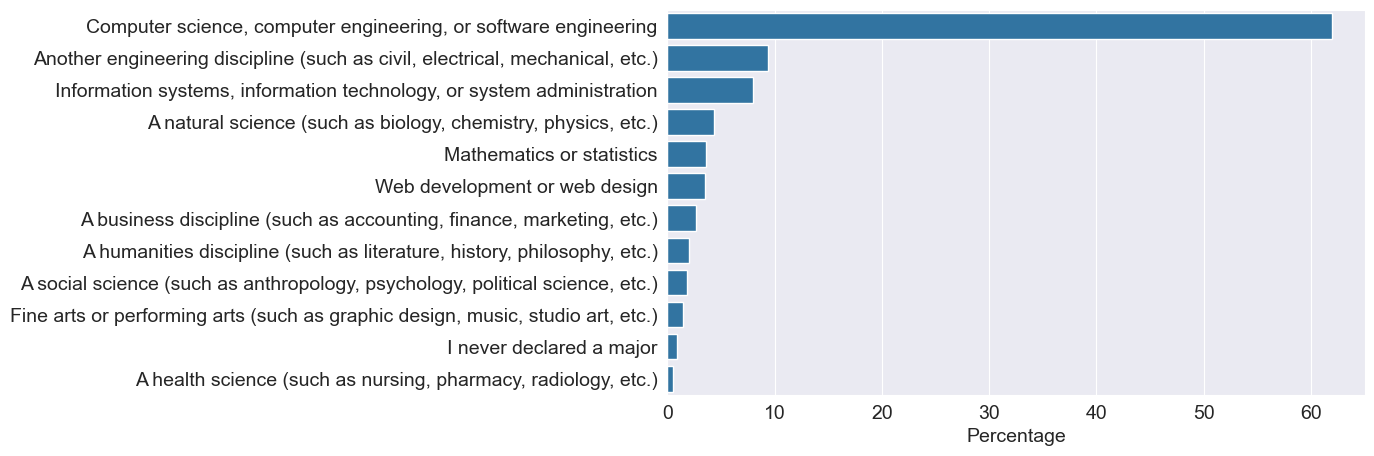

In [169]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()
sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.ylabel(None);
plt.xlabel('Percentage');
plt.show()

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

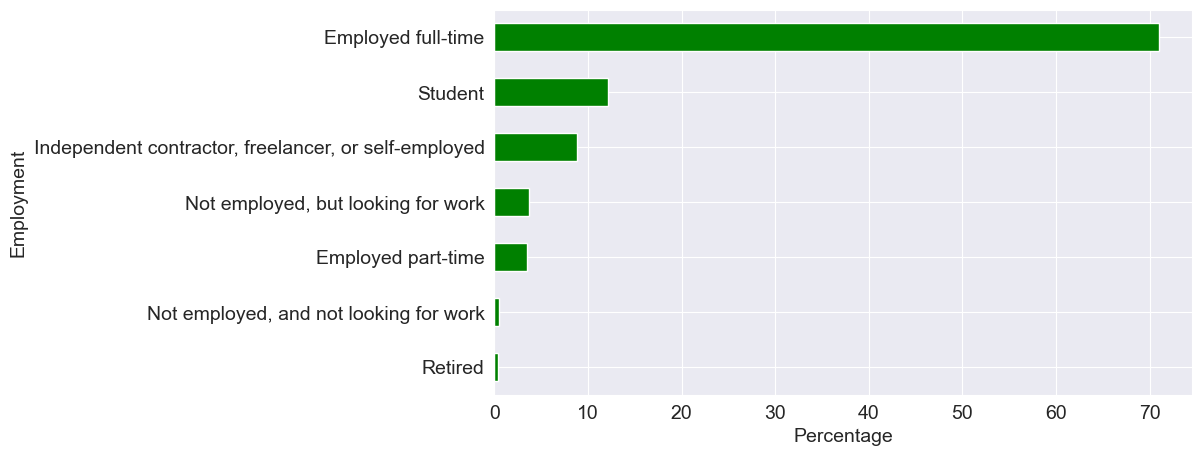

In [171]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.xlabel('Percentage');
plt.show()

It appears that close to 10% of respondents are employed part time or as freelancers.